In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns

sns.set(style='white', palette="Set2", color_codes=False)
sns.set_style("ticks")

%matplotlib inline

In [2]:
db_path = 'data.db'
db = sqlite3.connect(db_path)
table_name = 'test_table'

In [3]:
tasks = pd.read_sql_query(f'select * from "{table_name}"', db)
tasks['completion time'] = tasks['returned'] - tasks['start_submit']
tasks.head()

,run_id,monitor_tag,start_submit,end_submit,returned,workers,tasks_per_trial,trial,app_name,completion time
0,13276d28-428a-437b-986e-dc43af06ad0c,no_monitor,1.711568e+09,1.711568e+09,1.711568e+09,1,128,1,noop,0.180308
1,112be591-d718-4f1e-8087-ce69925df271,no_monitor,1.711568e+09,1.711568e+09,1.711568e+09,1,128,1,sleep10ms,1.472459
2,8499a6cd-3bcd-40a6-b26d-4dfd7b3b2438,no_monitor,1.711568e+09,1.711568e+09,1.711568e+09,1,128,1,sleep100ms,12.998905
3,ee7bd3fa-2518-4b4f-b5fa-336d5f8c856b,htex,1.711568e+09,1.711568e+09,1.711568e+09,1,128,1,noop,0.506468
4,8c86600c-6d64-4bed-b9de-aa5da43fb666,htex,1.711568e+09,1.711568e+09,1.711568e+09,1,128,1,sleep10ms,1.495756


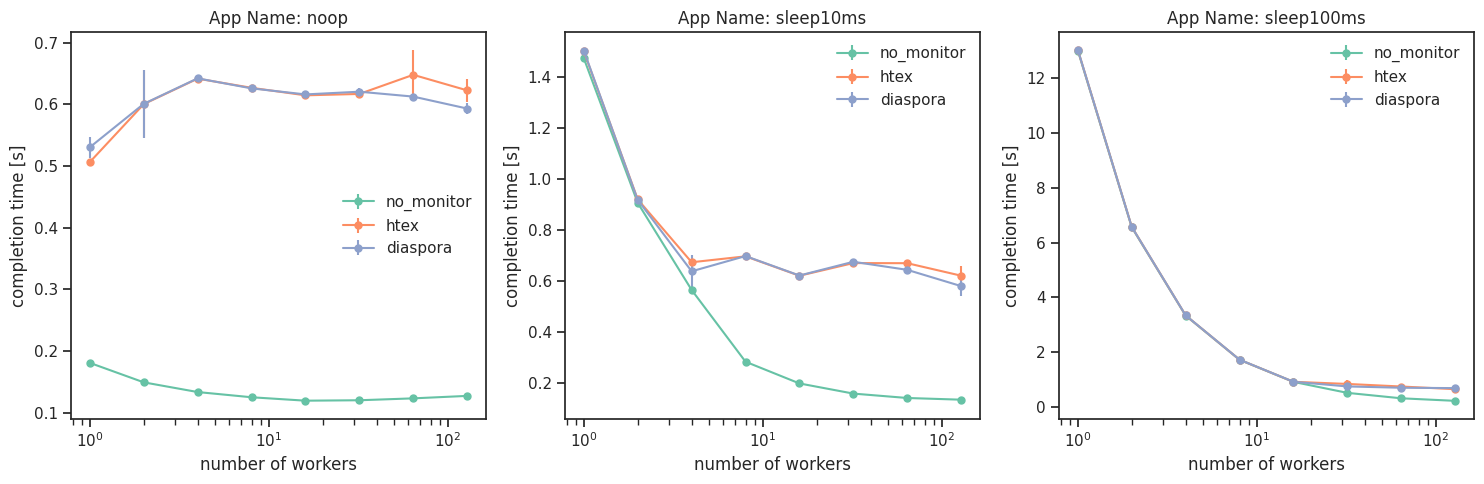

In [4]:
monitor_tags = ['no_monitor', 'htex', 'diaspora']
app_names = ['noop', 'sleep10ms', 'sleep100ms']

fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

for i, app_name in enumerate(app_names):
    ax = axs[i]
    for monitor_tag in monitor_tags:
        df = tasks[((tasks['monitor_tag'] == monitor_tag) & (tasks['app_name'] == app_name))]
        df = df.groupby('workers', as_index=False)['completion time']
        means = df.mean()
        standard_deviations = df.std()
        means.plot('workers', 'completion time', marker='o', ms=5, logx=True, yerr=list(standard_deviations['completion time']), label=monitor_tag, ax=ax)
    ax.set_ylabel('completion time [s]')
    ax.set_xlabel('number of workers')
    ax.legend(frameon=False)
    ax.set_title(f'App Name: {app_name}')

plt.tight_layout()
# plt.savefig(f'{table_name}.pdf')